In [2]:
from uproot_io import Events, View
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt

interaction_dictionary = {}
with open('interactions.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        key = int(row.pop('Idx'))
        interaction = row.pop('Interaction')
        interaction_dictionary[key] = interaction
        
particle_id_dict = {-2212:"ANTIPROTON", -321:"KAON -", -211:"PION -", -13:"MUON -", -11:"ELECTRON", 0:"NO BEST MATCH", 11:"POSTIRON", 13:"MUON +", 22:"GAMMA", 211:"PION +", 321:"KAON +", 2212:"PROTON", 3112:"SIGMA -", 3222:"SIGMA +"}

filename="projects\CheatedRecoFile_1.root"
events = Events(filename)

In [3]:
def particle_rms_w(num_particle):
    hits_x_w=np.array([])
    hits_x=np.array([])
    for i in range(events.reco_num_hits_w[num_particle]):
        hits_x = np.append(hits_x, events.reco_hits_w[num_particle][i])
        hits_x_w = np.append(hits_x_w, events.reco_hits_x_w[num_particle][i])
    hits_bf = np.polyfit(hits_x,hits_x_w,1)
    hits_x_w_fit= [i * hits_bf[0] + hits_bf[1] for i in hits_x]
    residuals = np.subtract(hits_x_w,hits_x_w_fit)
    rms = np.std(residuals)
    return rms


def particle_disp_w(num_particle):
    length = ((events.reco_hits_w[num_particle][0]-events.reco_hits_w[num_particle][-1])**2 + (events.reco_hits_x_w[num_particle][0]-events.reco_hits_x_w[num_particle][-1])**2)**0.5
    return length

def particle_path_length_w(num_particle):
    path_length = 0
    for i in range(1,events.reco_num_hits_w[num_particle]):
        dx = events.reco_hits_w[num_particle][i] - events.reco_hits_w[num_particle][i-1]
        dy = events.reco_hits_x_w[num_particle][i] - events.reco_hits_x_w[num_particle][i-1]
        path_length += (dx**2+dy**2)**0.5
    return path_length

def sinousity_w(num_particle):
    return particle_path_length_w(num_particle)/particle_disp_w(num_particle)

In [4]:
def plot_particle_w(num_particle):
    hits_x_w=np.array([])
    hits_x=np.array([])
    hits_adcs=np.array([])
    for i in range(events.reco_num_hits_w[num_particle]):
        hits_x = np.append(hits_x, events.reco_hits_w[num_particle][i])
        hits_x_w = np.append(hits_x_w, events.reco_hits_x_w[num_particle][i])
        hits_adcs = np.append(hits_adcs, events.reco_adcs_w[num_particle][i])
    hits_bf = np.polyfit(hits_x,hits_x_w,1)
    plt.scatter(hits_x,hits_x_w,s=8,c=hits_adcs,cmap='hot')
    plt.plot([hits_x[0],hits_x[-1]],[hits_x[0]*hits_bf[0]+hits_bf[1],hits_x[-1]*hits_bf[0]+hits_bf[1]])
    plt.text(hits_x[-1],hits_x[-1]*hits_bf[0]+hits_bf[1],str(num_particle),c="blue")

In [5]:
def idx_in_event(number_event,min_hits,purity):
    temp = np.where(events.event_number == number_event)[0]
    idx = [i for i in temp if events.reco_num_hits_w[i] > min_hits and events.purity[i] >= purity]
    return idx

def pdg_in_event(number_event,min_hits,purity):
    particle_pdg = [events.mc_pdg[i] for i in idx_in_event(number_event,min_hits,purity)]
    particle_type = [particle_id_dict[events.mc_pdg[i]] for i in idx_in_event(number_event,min_hits,purity)]
    return particle_pdg,particle_type

def plot_event(number_event,min_hits,purity, *args):
    temp = idx_in_event(number_event,min_hits,purity)
    pdg = pdg_in_event(number_event,min_hits,purity)[0]
    idx = [temp[i] for i in range(np.size(temp)) if pdg[i] in np.array(args)]
    if np.size(idx) != 0:
        for i in idx:
            plot_particle_w(i)
    else:
        for i in temp:
            plot_particle_w(i)
    print(np.dstack((idx_in_event(number_event,min_hits,purity),pdg_in_event(number_event,min_hits,purity)[0],pdg_in_event(number_event,min_hits,purity)[1])))        

[[['26' '13' 'MUON +']
  ['27' '2212' 'PROTON']
  ['28' '2212' 'PROTON']
  ['29' '2212' 'PROTON']
  ['30' '2212' 'PROTON']
  ['31' '2212' 'PROTON']
  ['49' '22' 'GAMMA']
  ['50' '22' 'GAMMA']
  ['52' '211' 'PION +']
  ['53' '2212' 'PROTON']]]


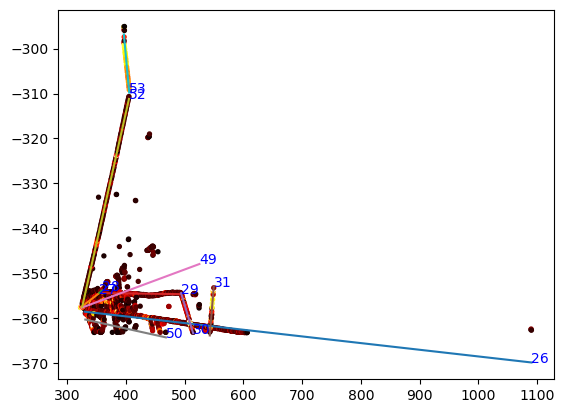

In [6]:


number_event = 1
min_hits = 7
purity = 0.8


#Plots specific event with specified minimum hits and purity. 4th argument is pdg code of type of particles you want displayed. i.e ,2212,11 for protons and positrons

plot_event(number_event,min_hits,purity)



2.3014788021878774 1.3529004138513845 137.1345525334712


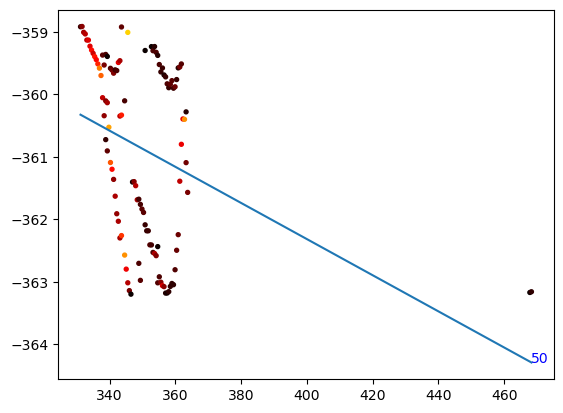

In [7]:
num_particle = 50

plot_particle_w(num_particle)
print(sinousity_w(num_particle),particle_rms_w(num_particle),particle_disp_w(num_particle))